# About me
![Flexper, innovation on demand](img/flexper_logo_large.jpg)

My name is **Tanguy Racinet** and I currently work at **Flexper**, a technological accelerator for startups.

### How to reach me
**mail**: tanguy@flexper.fr

**linkedin**: https://www.linkedin.com/in/tanguyracinet/

### Examples of projects I worked on
 * Movie rentals estimation and expected return on investment for movie streaming platform
 * Recommendation system for playlist generation in a streaming music platform 
 * Vehicle expected return and pricing over time in car renting service
 * Pollution evolution in air traffic study for the DGAC

# Topics covered in the course - what you should know about by the end
1. Generalities about Machine Learning
2. Classification algorithms
3. Recommender systems
4. Linear regression
5. Decision trees

# Course overview - what we're actually going to do
1. Day 1
    * open Q&A
    * Practice 1 - Generalities about Machine Learning
    * Practice 2 - Classification algorithms
2. Day 2
    * open Q&A
    * Practice - Recommender systems
3. Day 3
    * open Q&A
    * Practice 1 - Decision trees
    * Practice 2 - Linear regression

# Machine Learning concepts

Let's take a concrete example to better understand the different concepts and definition that you will require when developping a classification engine as a Machine Learning engineer.

### Your first day at the fair
You just arrive to the slaughterfest in super hero city, the biggest showdown of the year for powered people. You have been tasked by city officials to develop a model that can automatically identify superheros against supervilains in order to hopefully mitigate casualties.

You quickly gather your notes on all the powered people you've heard of and assemble your very own dataset. You still have a lot to do in order to get your data ready before you can train your first model.
![dataset: super people](img/data.jpg)

### Data splitting: Training, validation, test
Of course, you know that you should **never** evaluate your model on the data you used to train it since this is the best way to overfit your model, therefore you start by dividing your data in 2 distinct sets:
 * the *training set* to train your model
 * the *test set* to evaluate your trained model and check how well it generalise to unknown super persons.
![data splitting](img/data_splitting.jpg)
 
After careful consideration, you end up deciding against splitting your test set in **test** and **validation** given how small your dataset is. 

### K-fold Cross validation
Since you plan on using k-fold cross validation to automatically split your training set anyway, you should be covered. You will be able to train your model on k-1 splits of your training set k times to maximize your learning and find a model with good generalisation capabilities.
![cross validation with k-fold](img/cross_validation.jpg)


### Encoding
Despite being a proficient Machine Learning engineer, you're still human and you used words instead of sweet hard numbers when creating your dataset. You decide to quickly review in your head the different encoding techniques you could use on your data:
 * Label encoding for graduated variables
 * One hot encoding for independant variables
 * Cyclical encoding for... Well cyclical variables...
![encoding](img/encoding.jpg)

### Missing value imputation
Another problem with your dataset is that because of your memory problems, some data is missing from your dataset. That black and white picture you collected isn't helping you when deciding what color is his mask. You're now stuck trying to figure out how to fill in for the missing value.
![data imput](img/missing_value.jpg)

### Confusion matrix
Now that you're done with data processing, you can finally train your model. So let's get cracking and build your confusion matrix to evaluate your model performance:
![confusion matrix with log reg curve](img/confusion_matrix.jpg)

### ROC curve
Alright, you've got a somewhat functional model. But now that you're getting close to the end, you're receiving offers from both the superheros and the supervilains who are all trying to outbid each other for your algorithm.
You now have the power to sell it to either side so you'de better figure out who would profit most from it. The ROC curve is the perfect tool for you to illustrate your algorithm constraints.
![roc curve construction with confusion matrices](img/roc.jpg)
If you are intending on providing your solution to the superheros, they are probably interested in being able to identify supervilains to arrest them and send them to jail. But it would be problematic if they were to send other superheroes to jail because taht would reduce their forces and let's face it... That wouldn't be very heroic of them to condemn innocent people.

On the other hand, vilains would probably not be as prudent with it and might not have an issue with taking out a few of their own, just in case they might be vigilantes.
The ROC curve will help you identify the best threshold or hyper parameters for your algorithm, depending on your problem constraints.

### Area Under the Curve
After selling your first algorithm for a very nice profit, you now have enough funds to investigate other potential algorithm that might be even more efficient than your first attempt. You simply create the ROC for your various algorithms and calculate the Area Under each Curve. And that's it. Largest area wins.
![AUC for different models](img/auc.jpg)
You compute the AUC for all the different models you trained in order to identify the ultimate model that will definitely help you make a difference in super hero city. (and/or get filthy rich, that's your story after all)

### Conclusion
That's it, you just finished building a classification engine from scratch.
While it might seem all fun and games, the question raised by the supervilains offering more money to get their hands on your algorithm is actually something that happens more often than you'd expect in the real world.

It is your resposibility as a Machine Learning engineer to always be aware of the potential use cases of your models. Even without nefarious intentions, introducing biais is a very common occurence and it is always primordial to question the data collection process and whether you might introduce some biais with your handling of the data.

# Classification algorithms on Heart Diseases
Download the [data](https://canvas.supinfo.com/courses/85/files/7110/download?wrap=1) directly from [UCI](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)'s website and save it under ./data of your current directory on your host. (/home/jovyan/data in the docker container)
## Importing required libraries
Always put your imports at the top, it will greatly simplify your work when turning your notebooks into actual python code.

In [1]:
# Data manipulation:
import pandas as pd

# Data exploration:
!pip install pandas_profiling
import pandas_profiling as pp

# scikit learn ML models
# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
# cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


## Loading the data

In [2]:
heart_disease_df = pd.read_csv('../data/HeartDiseaseUCI.csv')

## Exploring the data
### What you need to understand
A very good tutorial on data exploration: [kaggle tutorial](https://www.kaggle.com/pavansanagapati/a-simple-tutorial-on-exploratory-data-analysis/notebook)

### And the quick win version

In [3]:
directory = '../data'

data_report = pp.ProfileReport(heart_disease_df)
data_report.to_file(output_file='{}/heart_disease_report.html'.format(directory))

In [4]:
data_report.to_widgets()

## Preparing the data
We replace the varying degree of disease with a binary classification: healthy/sick

In [5]:
categorical_num_df = heart_disease_df.copy()

categorical_num_df['num'] = categorical_num_df['num'].apply(
    lambda x: 'healthy' if x == 0 else 'sick'
)
categorical_num_df.head(2)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,healthy
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,sick


Because scikit learn models only work with numerical values, we need to replace our *healthy* and *sick* labels. There are two potential ways of turning this into numerical values:
 * Label encoding

In [6]:
label_encoded_df = categorical_num_df.copy()

le = LabelEncoder()
le.fit(label_encoded_df['num'])
label_encoded_df['num'] = le.transform(label_encoded_df['num'])

label_encoded_df.head(2)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1


 * One-hot encoding

In [7]:
pd.get_dummies(categorical_num_df).head(2)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num_healthy,num_sick
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,1,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,0,1


### Quick win:
One-liner that we could have used directly, after understanding the data.

In [8]:
heart_disease_df['num'] = heart_disease_df['num'].apply(lambda x: 0 if x == 0 else 1)
heart_disease_df.head(2)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1


### Data splitting

In [9]:
X = heart_disease_df[[ 
    col for col in heart_disease_df.columns if col not in ['num', 'Unnamed: 0']
]]
y = heart_disease_df['num']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [10]:
display(
    [
        'X_train: {}'.format(X_train.shape), 'y_train: {}'.format(y_train.shape), 
        'X_test: {}'.format(X_test.shape), 'y_test: {}'.format(y_test.shape)
    ],
    X_train.tail(),
    y_train.tail()
)

['X_train: (212, 13)', 'y_train: (212,)', 'X_test: (91, 13)', 'y_test: (91,)']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
211,38,1,1,120,231,0,0,182,1,3.8,2,0.0,7.0
67,54,1,3,150,232,0,2,165,0,1.6,1,0.0,7.0
25,50,0,3,120,219,0,0,158,0,1.6,2,0.0,3.0
196,69,1,1,160,234,1,2,131,0,0.1,2,1.0,3.0
175,57,1,4,152,274,0,0,88,1,1.2,2,1.0,7.0


211    1
67     0
25     0
196    0
175    1
Name: num, dtype: int64

## Using a [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
Pipelines in scikit learn are a very important concept. They encapsulate a number of **transformers** and **estimators**.

**Transformers** apply a function over your data to modify it, commonly used to apply preprocessing steps over the data before training a model.

**Estimators** apply a ML model to make predictions.

These are the steps we'll take when [preprocessing our data with scikit learn](https://scikit-learn.org/stable/modules/preprocessing.html) before we can apply our model:
 * [Fill in missing values](https://scikit-learn.org/stable/modules/impute.html). We will use the [Simple Imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html).
 * Scale and center the data with the [Standard scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to reduce feature range impact for enclidian distances. 
 * We can also conduct a [Principal Component Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of dimensions and extract meaningful informations from the dataset.

## Training a classification model: [K-Neirest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
Simple pipeline example:

[Pipeline] ........... (step 1 of 4) Processing imputer, total=   0.0s
[Pipeline] ............ (step 2 of 4) Processing scaler, total=   0.0s
[Pipeline] ............... (step 3 of 4) Processing pca, total=   0.0s
[Pipeline] .... (step 4 of 4) Processing knn_classifier, total=   0.0s


0.8021978021978022

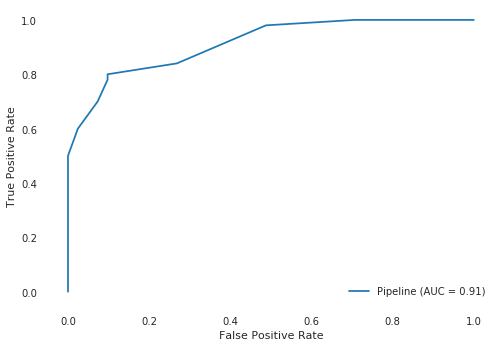

In [11]:
knn_pipe_example = Pipeline(
    steps = [
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=12)),
        ('knn_classifier', KNeighborsClassifier(n_neighbors=10))
    ],
    verbose=True
)

knn_pipe_example.fit(X_train, y_train)
display(knn_pipe_example.score(X_test, y_test))

plot_roc_curve(knn_pipe_example, X_test, y_test)

And now, the same with python *list* and *dict* comprehension to reuse the same preprocessing steps for every model we'll test, along with a **cross_validate** utility function to perform grid search with multiple hyper parameters.

In [12]:
preprocessing_steps = [
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=12))
]
preprocessing_params = {
    'imputer__strategy': ['mean', 'median'],
    'scaler__with_mean': [True, False],
    'scaler__with_std': [True, False],
    'pca__n_components': [11, 12, 13]
}

def cross_validate(model, params):
    # create a gridsearch of the pipeline, the find the best hyper parameters
    grid_param = { **preprocessing_params, **params }
    gridsearch = GridSearchCV(model, grid_param, cv=5, verbose=1, n_jobs=-1)
    gridsearch_result = gridsearch.fit(X_train, y_train)

    display(gridsearch_result.best_estimator_)
    display('Best model accuracy over previously unseen data: {}'.format(
        gridsearch_result.score(X_test, y_test)
    ))
    return gridsearch

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:    7.4s finished


Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=12,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('classifier',
                 KNeighborsClassifier(algorithm='brute', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=10, p=2,
                                      weights='uniform'))],
         verbose=False)

'Best model accuracy over previously unseen data: 0.8021978021978022'

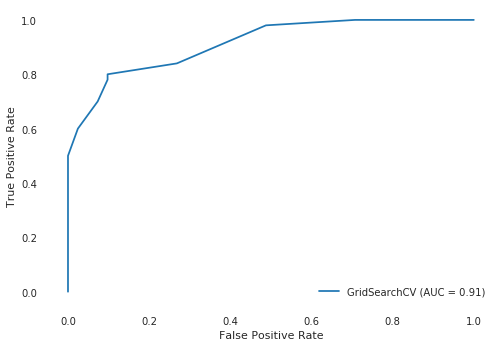

In [13]:
knn_pipe = Pipeline(
    preprocessing_steps + [('classifier', KNeighborsClassifier())]
)
knn_params = {
    'classifier__n_neighbors': [5, 10, 15, 20],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['brute', 'ball_tree']
}

knn_gridsearch = cross_validate(knn_pipe, knn_params)

plot_roc_curve(knn_gridsearch, X_test, y_test)

## Training a classification model: [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    3.7s finished


Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=12,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('classifier',
                 LinearSVC(C=0.5, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=0,
                           tol=0.0001, verbose=0))],
         verbose=False)

'Best model accuracy over previously unseen data: 0.8131868131868132'

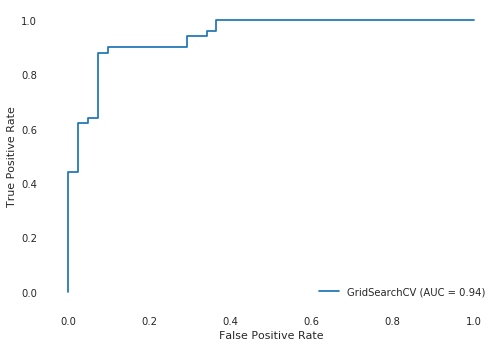

In [14]:
svm_pipe = Pipeline(
    steps = preprocessing_steps + [('classifier', LinearSVC(random_state=0))]
)
svm_params = {
    'classifier__C': [0.5, 1, 1.5],
    'classifier__loss': ['hinge', 'squared_hinge']
}

svm_gridsearch = cross_validate(svm_pipe, svm_params)

plot_roc_curve(svm_gridsearch, X_test, y_test)

## Training a classification model: [Linear Discriminant Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    1.5s finished


Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=False)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=11,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('classifier',
                 LinearDiscriminantAnalysis(n_components=None, priors=None,
                                            shrinkage=None, solver='svd',
                                            store_covariance=False,
                                            tol=0.0001))],
         verbose=False)

'Best model accuracy over previously unseen data: 0.8131868131868132'

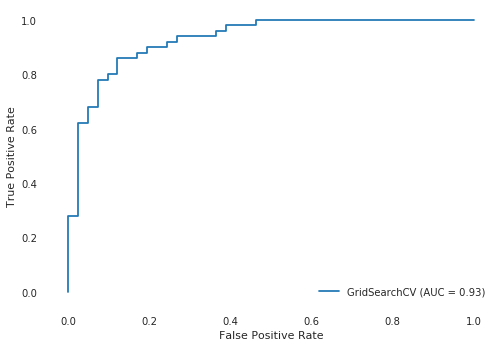

In [15]:
lda_pipe = Pipeline(
    steps = preprocessing_steps + [('classifier', LinearDiscriminantAnalysis())]
)
lda_params = {
    'classifier__solver': ['svd', 'lsqr', 'eigen']
}

lda_gridsearch = cross_validate(lda_pipe, lda_params)

plot_roc_curve(lda_gridsearch, X_test, y_test)

## Training a classification model: [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  83 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.6s finished


Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=False)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=11,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('classifier', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

'Best model accuracy over previously unseen data: 0.8571428571428571'

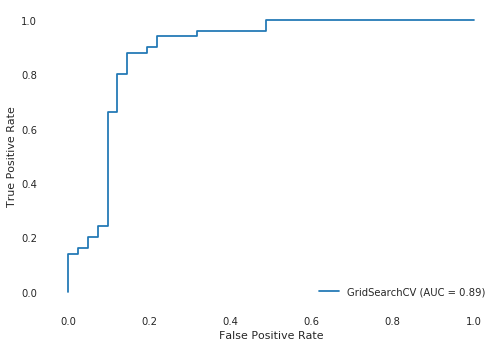

In [16]:
gnb_pipe = Pipeline(steps = preprocessing_steps + [('classifier', GaussianNB())])
gnb_params = {}

gnb_gridsearch = cross_validate(gnb_pipe, gnb_params)

plot_roc_curve(gnb_gridsearch, X_test, y_test)

## Training a classification model: [Logistic regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    5.7s finished


Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=12,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('classifier',
                 LogisticRegression(C=0.5, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbo

'Best model accuracy over previously unseen data: 0.8131868131868132'

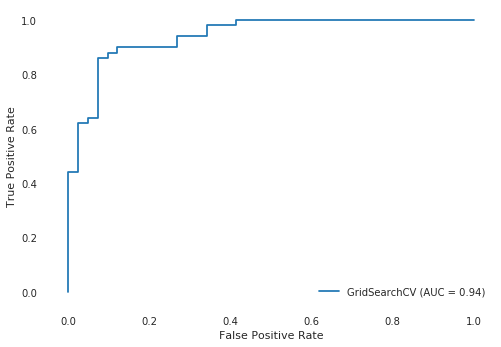

In [17]:
lr_pipe = Pipeline(preprocessing_steps + [('classifier', LogisticRegression())])
lr_params = {
    'classifier__C': [0.1, 0.5, 1, 1.5],
    'classifier__solver': ['lbfgs', 'liblinear']
}

lr_gridsearch = cross_validate(lr_pipe, lr_params)

plot_roc_curve(lr_gridsearch, X_test, y_test)

## Testing out different setups: [Cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) over multiple models

Fitting 10 folds for each of 816 candidates, totalling 8160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 2420 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 6420 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 8160 out of 8160 | elapsed:   30.6s finished


Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=False)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=11,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('classifier',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='liblinear', tol=0.0001, ve

'Best model accuracy over previously unseen data: 0.8131868131868132'

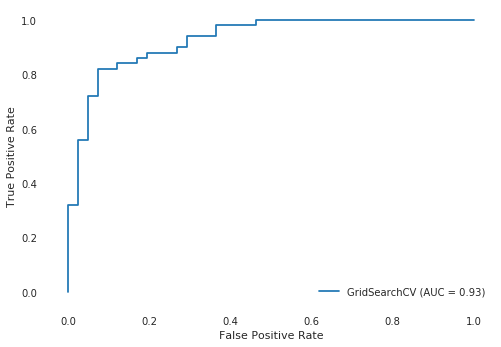

In [18]:
# Create a pipeline
pipe = Pipeline(preprocessing_steps + [('classifier', LogisticRegression())])

# Create list with candidate learning algorithms and their hyperparameters
grid_param = [
    { 
        'classifier': [KNeighborsClassifier()], 
        **preprocessing_params, 
        **knn_params 
    },
    { 
        'classifier': [LinearSVC()], 
        **preprocessing_params, 
        **svm_params 
    },
    { 
        'classifier': [LinearDiscriminantAnalysis()], 
        **preprocessing_params, 
        **lda_params
    },
    { 
        'classifier': [GaussianNB()], 
        **preprocessing_params, 
        **gnb_params 
    },
    { 
        'classifier': [LogisticRegression()], 
        **preprocessing_params, 
        **lr_params 
    }
]

# create a gridsearch of the pipeline, then fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=10, verbose=1, n_jobs=-1)
gridsearch_result = gridsearch.fit(X_train, y_train)

display(gridsearch_result.best_estimator_)
display('Best model accuracy over previously unseen data: {}'.format(
    gridsearch_result.score(X_test, y_test)
))

plot_roc_curve(gridsearch_result, X_test, y_test)